In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from unidecode import unidecode

In [105]:
data = pd.read_csv('house.csv', index_col=0)
data

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích (m2),Dài (m),Rộng (m),Giá/m2 (triệu)
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,NaN,NaN,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,9.00,4.0,86.11
...,...,...,...,...,...,...,...,...,...,...,...,...
82491,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3.0,38.0,NaN,NaN,81.58
82492,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,50.0,NaN,NaN,292.00
82493,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,NaN,NaN,341.46
82494,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4.0,60.0,NaN,NaN,101.67


In [103]:
type(data['Giá'].min())

float

In [96]:
data['Quận'].unique()

array(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ', 'Quận Đống Đa', 'Quận Hà Đông', 'Huyện Thanh Trì',
       'Quận Hoàng Mai', 'Quận Long Biên', 'Quận Hoàn Kiếm',
       'Quận Nam Từ Liêm', 'Quận Ba Đình', 'Huyện Hoài Đức',
       'Quận Bắc Từ Liêm', 'Huyện Đan Phượng', 'Huyện Thanh Oai',
       'Huyện Sóc Sơn', 'Huyện Gia Lâm', 'Huyện Chương Mỹ',
       'Huyện Đông Anh', 'Huyện Thường Tín', 'Thị xã Sơn Tây',
       'Huyện Mê Linh', 'Huyện Thạch Thất', 'Huyện Quốc Oai',
       'Huyện Phúc Thọ', 'Huyện Phú Xuyên', 'Huyện Ba Vì', nan,
       'Huyện Mỹ Đức'], dtype=object)

In [97]:
data = data[data['Quận'].isin(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng'])]
data['Quận'].unique()

array(['Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng'],
      dtype=object)

In [73]:
data['Quận'] = data['Quận'].fillna('').apply(lambda x: x.replace('Quận ', '').replace('Huyện ', '').replace('Thị xã ', ''))
data['Quận'] = data['Quận'].replace(['Nam Từ Liêm', 'Bắc Từ Liêm'], 'Từ Liêm')
data['Quận'] = data['Quận'].apply(unidecode)
data.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Giá
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cau Giay,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,"86,96 triệu/m²",8.696000e+10
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuan,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3.0,37.0,NaN,NaN,"116,22 triệu/m²",1.162200e+11
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Ba Trung,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65 triệu/m²,6.500000e+10
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tay Ho,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100 triệu/m²,1.000000e+11
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuan,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,NaN,4.0,36.0,9.00,4.0,"86,11 triệu/m²",8.611000e+10


In [80]:
lmao = data.groupby('Quận')['Giá'].mean().reset_index()
lmao

,Quận,Giá
0,,4.300000e+10
1,Ba Dinh,1.296782e+11
2,Ba Vi,6.108333e+09
3,Cau Giay,1.284905e+11
4,Chuong My,2.352350e+10
5,Dan Phuong,4.072000e+10
6,Dong Anh,3.558948e+10
7,Dong Da,1.410706e+11
8,Gia Lam,5.797893e+10
9,Ha Dong,8.681490e+10


In [81]:
gdf = gpd.read_file('diaphanhuyen\Dia_phan_Huyen.shp')
gdf = gdf[['Ten_Huyen', 'geometry']]
gdf = gdf.rename(columns={'Ten_Huyen': 'Quận'})
gdf.head()

,Quận,geometry
0,Nam Căn,"POLYGON ((105.05492 8.85322, 105.05819 8.85155..."
1,Dam Doi,"POLYGON ((105.16041 9.09551, 105.16228 9.09309..."
2,Cái Nước,"POLYGON ((105.08692 9.13987, 105.08773 9.13954..."
3,Đông Hải,"POLYGON ((105.55273 9.23437, 105.56841 9.17901..."
4,TP. Cà Mau,"POLYGON ((105.17230 9.26629, 105.17518 9.26575..."


In [82]:
lmao = lmao.merge(gdf, on='Quận', how='left')
lmao

,Quận,Giá,geometry
0,,4.300000e+10,None
1,Ba Dinh,1.296782e+11,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
2,Ba Vi,6.108333e+09,"POLYGON ((105.42320 21.28991, 105.43024 21.283..."
3,Cau Giay,1.284905e+11,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
4,Chuong My,2.352350e+10,"POLYGON ((105.69211 20.95937, 105.69213 20.958..."
5,Dan Phuong,4.072000e+10,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
6,Dong Anh,3.558948e+10,"POLYGON ((105.87070 21.20770, 105.87097 21.207..."
7,Dong Da,1.410706e+11,"POLYGON ((105.83157 21.03140, 105.83820 21.030..."
8,Gia Lam,5.797893e+10,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
9,Ha Dong,8.681490e+10,"POLYGON ((105.73860 20.99242, 105.74547 20.992..."


In [83]:
lmao = gpd.GeoDataFrame(lmao[['Giá', 'geometry']])
lmao

,Giá,geometry
0,4.300000e+10,None
1,1.296782e+11,"POLYGON ((105.83844 21.05651, 105.84544 21.054..."
2,6.108333e+09,"POLYGON ((105.42320 21.28991, 105.43024 21.283..."
3,1.284905e+11,"POLYGON ((105.80648 21.04909, 105.80526 21.049..."
4,2.352350e+10,"POLYGON ((105.69211 20.95937, 105.69213 20.958..."
5,4.072000e+10,"POLYGON ((105.65003 21.15468, 105.66039 21.152..."
6,3.558948e+10,"POLYGON ((105.87070 21.20770, 105.87097 21.207..."
7,1.410706e+11,"POLYGON ((105.83157 21.03140, 105.83820 21.030..."
8,5.797893e+10,"POLYGON ((105.91323 21.12309, 105.91990 21.122..."
9,8.681490e+10,"POLYGON ((105.73860 20.99242, 105.74547 20.992..."


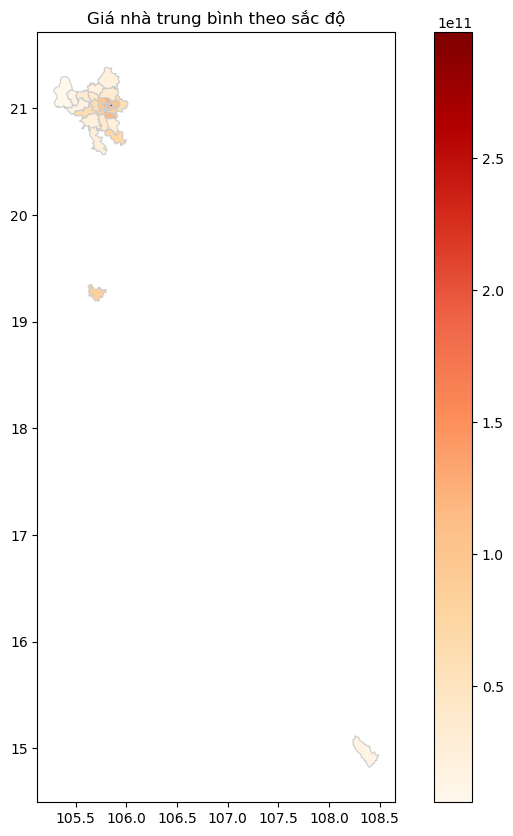

In [84]:
# Vẽ bản đồ
fig, ax = plt.subplots(figsize=(10, 10))
lmao.plot(column='Giá', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Giá nhà trung bình theo sắc độ')
plt.show()